In [1]:
# Import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure 

#%matplotlib inline
#matplotlib.rcParams['figure.figsize'] = (12,8)

In [20]:
#Read the data
df = pd.read_csv(r'C:\Users\perez\OneDrive\Documents\Portfolio\Project3\movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [21]:
# Drop null values 
df= df.dropna()

# Drop duplicates
df.drop_duplicates()

df.shape

(5421, 15)

In [ ]:
# Column data types
df.dtypes

In [22]:
#Get rid of decimal for Budget, Gross, and Votes columns 
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [23]:
#Create a corrected year column so the release date and year match 
df['year_correct'] = df['released'].astype(str).str.split('(').str[-2].astype(str).str[-5:-1]
df['year_correct'] = df['year_correct'].astype('int64')
df.sample(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
3255,Rush Hour,PG-13,Action,1998,"September 18, 1998 (United States)",7.0,247000,Brett Ratner,Ross LaManna,Jackie Chan,United States,33000000,244721064,New Line Cinema,98.0,1998
4733,The Family Stone,PG-13,Comedy,2005,"December 16, 2005 (United States)",6.3,63000,Thomas Bezucha,Thomas Bezucha,Dermot Mulroney,United States,18000000,92884429,The Family Stone,103.0,2005
2872,That Thing You Do!,PG,Comedy,1996,"October 4, 1996 (United States)",6.9,64000,Tom Hanks,Tom Hanks,Tom Hanks,United States,26000000,34585416,Clavius Base,108.0,1996
6539,Unfriended,R,Horror,2014,"April 17, 2015 (United States)",5.5,71000,Levan Gabriadze,Nelson Greaves,Heather Sossaman,United States,1000000,62882090,Bazelevs Production,83.0,2015
5536,Daybreakers,R,Action,2009,"January 8, 2010 (United States)",6.4,124000,Michael Spierig,Michael Spierig,Ethan Hawke,Australia,20000000,51417188,Lionsgate,98.0,2010


In [24]:
# Map categorical data
df_numerized = df.copy(deep=True)

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
       df_numerized[col_name] = df_numerized[col_name].astype('category')
       df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.sample(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
1433,4938,6,6,1988,1062,5.9,2000,1422,773,1701,46,5000000,429028,760,90.0,1988
4689,2551,4,1,2005,1647,6.8,22000,398,2225,1632,46,4000000,866999,520,101.0,2006
2899,5218,5,1,1996,742,6.6,22000,1623,446,777,47,38000000,10292300,793,129.0,1996
6068,1445,6,6,2012,2018,7.3,334000,1674,1502,436,47,31000000,161772375,1108,138.0,2012
1923,3541,5,4,1991,1890,6.6,15000,1323,2575,1525,47,25000000,36489888,1108,97.0,1991


In [11]:
#Find correlation 
corr=df_numerized.corr().round(2)
corr.unstack().sort_values().drop_duplicates()

genre         budget         -0.37
gross         genre          -0.24
rating        budget         -0.20
gross         rating         -0.18
votes         genre          -0.14
rating        company        -0.09
genre         company        -0.07
              runtime        -0.06
year_correct  director       -0.04
year          writer         -0.03
budget        star           -0.02
star          name           -0.01
director      released        0.00
              score           0.01
rating        year_correct    0.02
year          name            0.03
votes         country         0.04
score         released        0.05
              year_correct    0.06
budget        score           0.07
runtime       year            0.08
company       votes           0.12
runtime       rating          0.14
rating        genre           0.15
company       budget          0.17
year_correct  votes           0.20
votes         year            0.21
score         gross           0.22
writer        direct

Text(0.5, 1.0, 'Correlation Matrix')

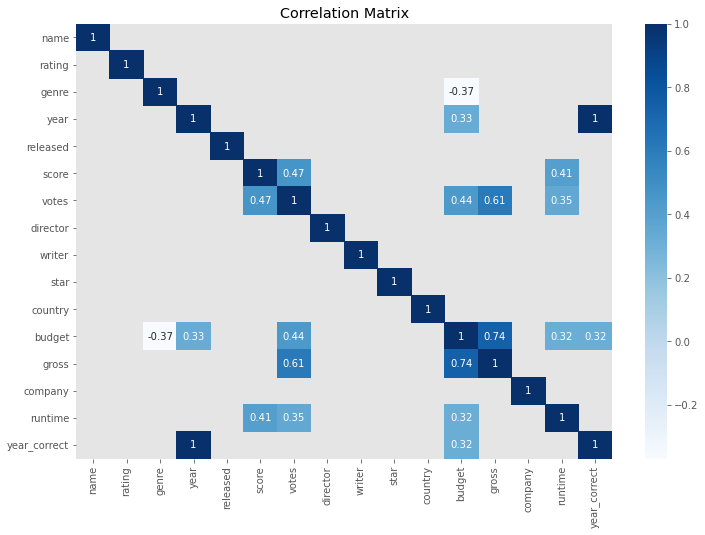

In [12]:
# Visualize correlation 
moderate_corr = corr[((corr>=.3) | (corr<= -.3))] 
plt.figure(figsize=(12,8))
sns.heatmap(moderate_corr,annot=True, cmap="Blues")
plt.title('Correlation Matrix')

Text(0, 0.5, 'Gross Income')

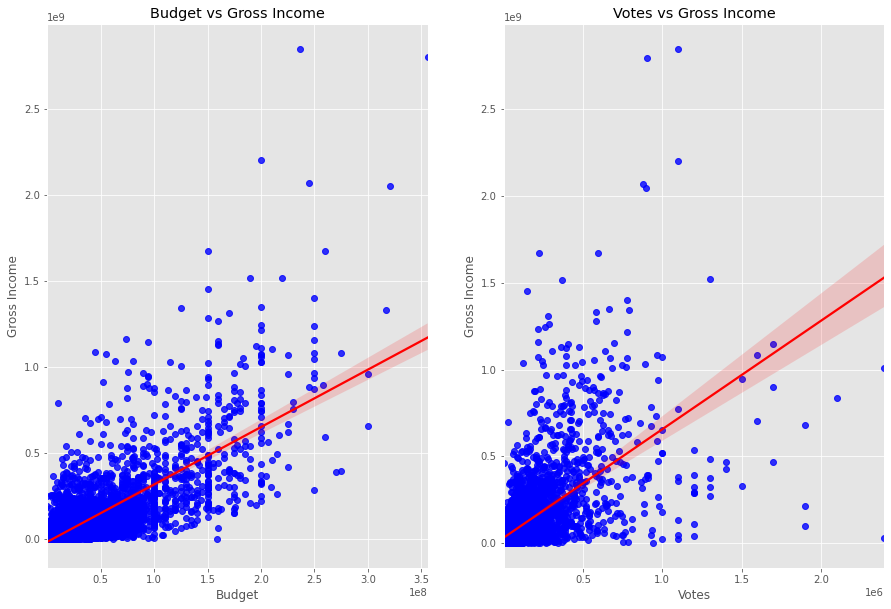

In [28]:
#set the size of overall figure
fig = plt.figure(figsize=(15,10))

# Budget Vs Gross Income with regression line 
plt.subplot(1,2,1)
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color': 'blue'}, line_kws={'color':'red'})
plt.title('Budget vs Gross Income')
plt.xlabel('Budget')
plt.ylabel('Gross Income')

# Votes Vs Gross Income with regression line
plt.subplot(1,2,2)
sns.regplot(x='votes', y='gross', data=df, scatter_kws={'color': 'blue'}, line_kws={'color':'red'})
plt.title('Votes vs Gross Income')
plt.xlabel('Votes')
plt.ylabel('Gross Income')

<AxesSubplot:xlabel='genre', ylabel='gross'>

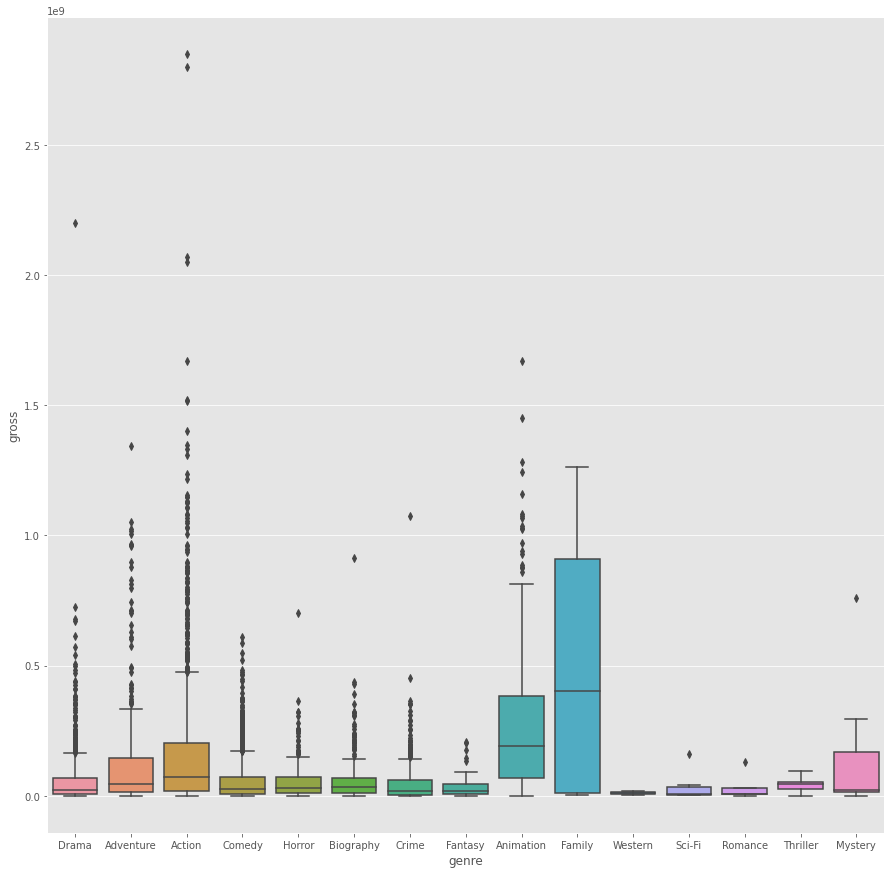

In [29]:
# How does gross income compare by genre
plt.subplots(figsize=(15,15))
sns.boxplot(x='genre', y='gross', data=df)

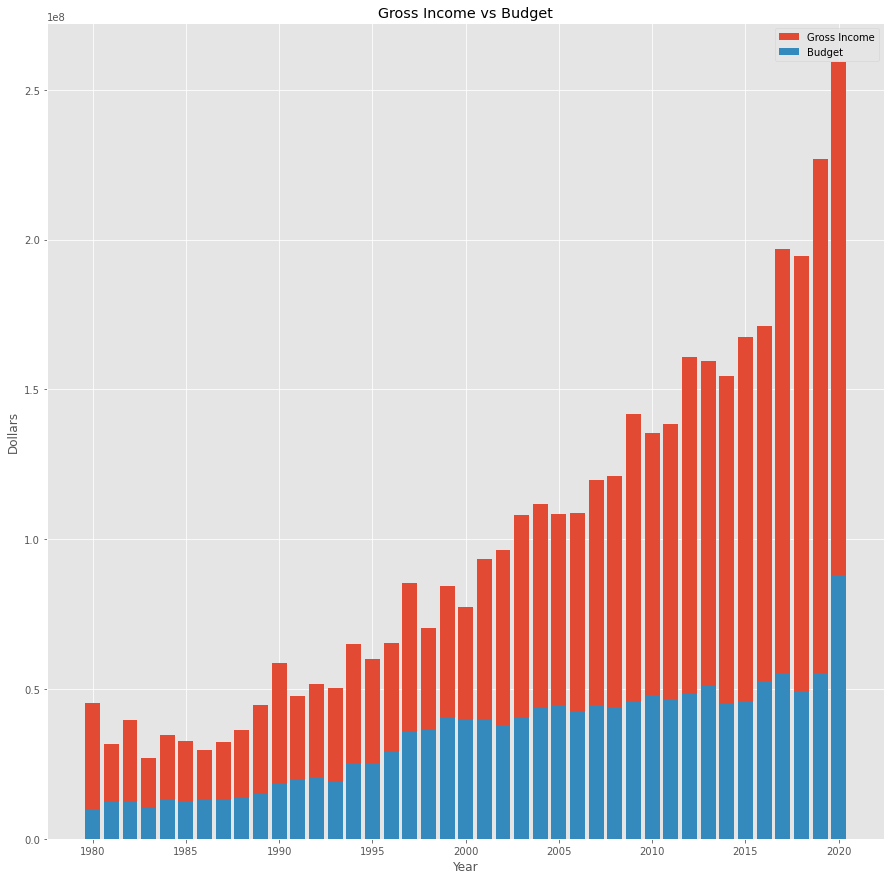

In [30]:
# Average gross income and budget per year
plt.subplots(figsize=(15,15))
yearly_mean= df.groupby('year_correct').mean().reset_index()

plt.bar(yearly_mean['year_correct'],yearly_mean['gross'], label='Gross Income')
plt.bar(yearly_mean['year_correct'],yearly_mean['budget'], label='Budget')
plt.title('Gross Income vs Budget')
plt.xlabel('Year')
plt.ylabel('Dollars')
plt.legend(loc='best')